# OCO-2 XCO2 Data Analysis

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
import datetime
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use("seaborn-v0_8")
import csv

import numpy as np
import os
import os.path
import pandas as pd

from IPython.core.display import HTML
from IPython.display import clear_output
from IPython.core.pylabtools import figsize

import netCDF4
import numpy as np

In [2]:
from oco_tools import *

In [3]:
file_dict = dict_oco2_xco2
file_dict

{'lat': 'latitude',
 'lon': 'longitude',
 'sza': 'solar_zenith_angle',
 'vza': 'sensor_zenith_angle',
 'saa': 'Sounding/solar_azimuth_angle',
 'vaa': 'Sounding/sensor_azimuth_angle',
 'xco2': 'xco2',
 'xco2_sigma': 'xco2_uncertainty',
 'xco2_qual': 'xco2_quality_flag',
 'time': 'time'}

In [10]:
# which dataset
#path_files = 'D:/Privat/Uni/Masterthesis/Data/GHG_data/disc_gsfc_nasa/230823/subset_OCO2_L2_Lite_FP_11.1r_20230823_193141_/data_analysis_test_2'
path_files = 'C:/Users/AG Geomatik/Downloads/'

## Select region

In [5]:
f = netCDF4.Dataset('D:/Privat/Uni/Masterthesis/Data/GHG_data/disc_gsfc_nasa/230823/subset_OCO2_L2_Lite_FP_11.1r_20230823_193141_/data_analysis_test/oco2_LtCO2_230101_B11100Ar_230609171456s.nc4')
print(f.variables.keys())

dict_keys(['sounding_id', 'levels', 'bands', 'vertices', 'date', 'latitude', 'longitude', 'time', 'solar_zenith_angle', 'sensor_zenith_angle', 'xco2_quality_flag', 'xco2_qf_bitflag', 'xco2_qf_simple_bitflag', 'source_files', 'file_index', 'vertex_latitude', 'vertex_longitude', 'xco2', 'xco2_x2019', 'xco2_uncertainty', 'xco2_apriori', 'pressure_levels', 'co2_profile_apriori', 'xco2_averaging_kernel', 'pressure_weight'])


In [6]:
import xarray as xr

# Load the netCDF file
#f = xr.open_dataset('D:/Privat/Uni/Masterthesis/Data/GHG_data/disc_gsfc_nasa/230823/subset_OCO2_L2_Lite_FP_11.1r_20230823_193141_/data_analysis_test/oco2_LtCO2_230101_B11100Ar_230609171456s.nc4')
f = xr.open_dataset('C:/Users/AG Geomatik/Downloads/oco2_LtCO2_180102_B10206Ar_200729234017s.SUB.nc4')
print(f.attrs)

{'errors': 'File /ftp/data/s4pa/OCO2_DATA/OCO2_L2_Lite_FP.10r/2018/oco2_LtCO2_180102_B10206Ar_200729234017s.nc4 had no data within the specified subset parameters. Subset parameters:  {"PRODUCT": ["OCO2_L2_Lite_FP.10r"], "INFILENAMES": ["oco2_LtCO2_180102_B10206Ar_200729234017s.nc4"], "INFILETYPE": ["nc4"], "OUTFILETYPE": ["nc4"], "TIMENAME": [["UNIX", "/time"]], "VARNAMES": ["/date", "/vertex_latitude", "/vertex_longitude", "/xco2", "/xco2_quality_flag", "/sounding_id", "/vertices"], "BOXLONRANGE": [-77.558, -73.032], "BOXLATRANGE": [43.418, 45.923], "GRIDTYPES": ["SWATH"], "CONVERTFILETYPE": [false]}'}


In [7]:
# set bounding box

#latMin = 45
#latMax = 45
#lonMin = -74
#lonMax = -73

latMin = -85
latMax = 58
lonMin = -181
lonMax = 181

In [11]:
oco2_aoi = OCO2(path_files+'/*.nc4', file_dict, latMin, latMax, lonMin, lonMax)

found 8 files
Traceback (most recent call last):
  File "D:\Privat\Uni\Masterthesis\Data\GHG_data\disc_gsfc_nasa\230823\oco_tools.py", line 34, in __init__
    lat = h[dictionary['lat']][:]
  File "h5py\_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py\_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "C:\Users\AG Geomatik\anaconda3\lib\site-packages\h5py\_hl\group.py", line 357, in __getitem__
    oid = h5o.open(self.id, self._e(name), lapl=self._lapl)
  File "h5py\_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py\_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py\h5o.pyx", line 190, in h5py.h5o.open
KeyError: "Unable to open object (object 'latitude' doesn't exist)"

error opening file  C:/Users/AG Geomatik/Downloads\oco2_LtCO2_171231_B10206Ar_200730102534s.SUB (1).nc4
Traceback (most recent call last):
  File "D:\Privat\Uni\Masterthesis\Data\GHG_data\disc_gsfc_nasa\230823\oco_tools.py", line 34, in __in

In [12]:
t_unit_oco2 = "seconds since 1970-1-1 0:0:0"
t_cal = u"gregorian"

# Convert oco2 time units to a python time
oco2_aoi.time_python  = convert_time(oco2_aoi.time, t_unit_oco2, t_cal)
oco2_aoi.time_str = [datetime.datetime.fromisoformat(str(date)) for date in oco2_aoi.time_python]

In [12]:
# oco2_aoi.time[0] # seconds since 1970
# oco2_aoi.time_python[0].strftime("%d/%m/%Y, %H:%M:%S")
# oco2_aoi.time_str[0]

## Timeseries

Text(0.5, 1.0, 'MTL CO2 Levels 09/2022-06/2023 (OCO-2 XCO2)')

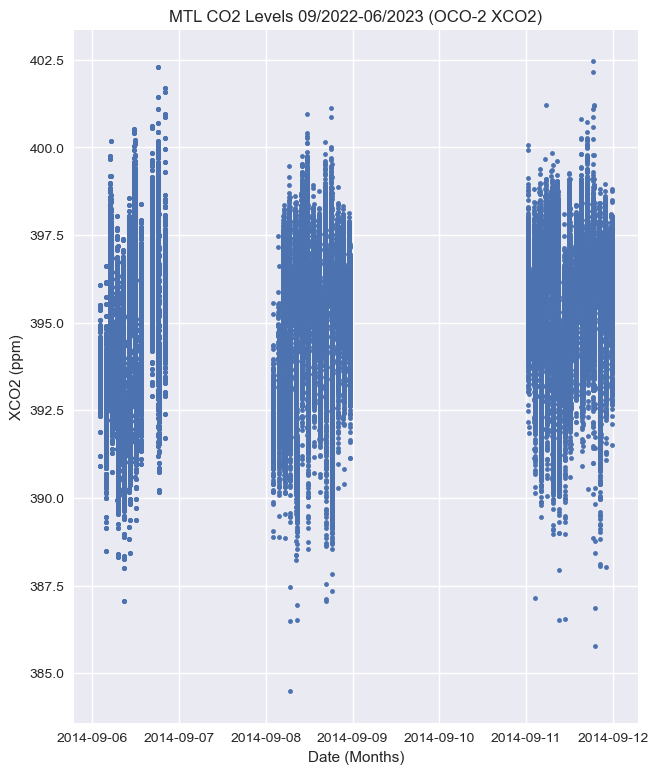

In [13]:
# plot a timeseries
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.plot(oco2_aoi.time_str, oco2_aoi.xco2,'.')
plt.ylabel('XCO2 (ppm)')
plt.xlabel('Date (Months)')
plt.title('MTL CO2 Levels 09/2022-06/2023 (OCO-2 XCO2)')
#plt.savefig('D:/Privat/Uni/Masterthesis/Data/GHG_data/disc_gsfc_nasa/230823/oco2-xco2-mtl.png')

## Histogram

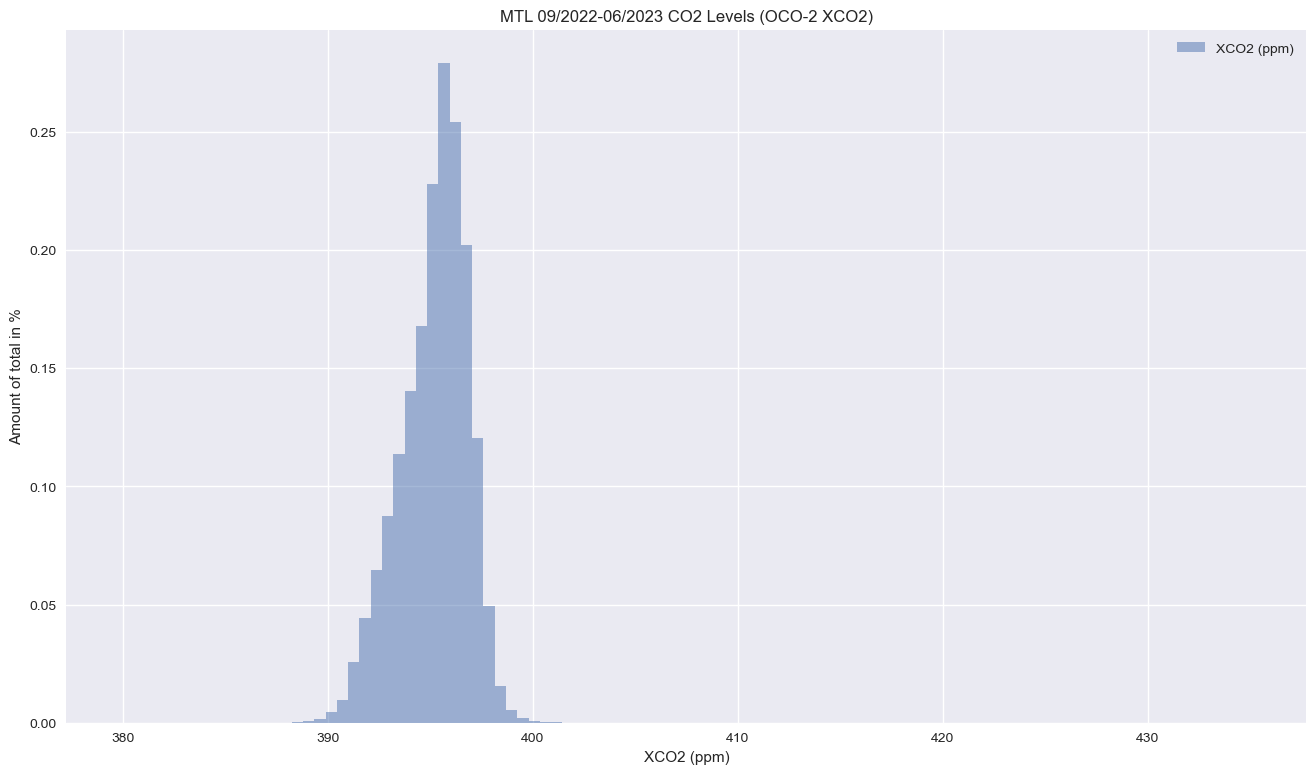

In [14]:
# let us look at a histogram
plt.figure(figsize=(16,9))
plt.hist(oco2_aoi.xco2, 100,range=(380,435), density=True, alpha=0.5, label='XCO2 (ppm)')
plt.title('MTL 09/2022-06/2023 CO2 Levels (OCO-2 XCO2)')
plt.ylabel('Amount of total in %')
plt.xlabel('XCO2 (ppm)')
plt.legend(loc=0)
#plt.savefig('D:/Privat/Uni/Masterthesis/Data/GHG_data/disc_gsfc_nasa/230823/oco2-xco2-nz-2019-hist.png')

In [15]:
print('Standard deviation of measurement ' + str(np.std(oco2_aoi.xco2)) )
print('Expected standard deviation based on posteriori error ' + str(np.mean(oco2_aoi.xco2_sigma)) )

Standard deviation of measurement 1.6753926
Expected standard deviation based on posteriori error 0.48071536


##  Running average timeseries

In [16]:
# Get data every 3 days and create a running mean of +/- 3 days:
# Define data range to smooth on (every 3 days)
from datetime import datetime
dates = np.arange('2022-09', '2023-02', dtype='datetime64[3D]').astype(datetime)

In [17]:
len(dates)

51

In [18]:
# Use dates with a 3 day time-step and now use a +/- 3 day filter for the running mean:
timeseries_oco2 = running_mean(oco2_aoi.time_str, oco2_aoi.xco2, dates, 3)

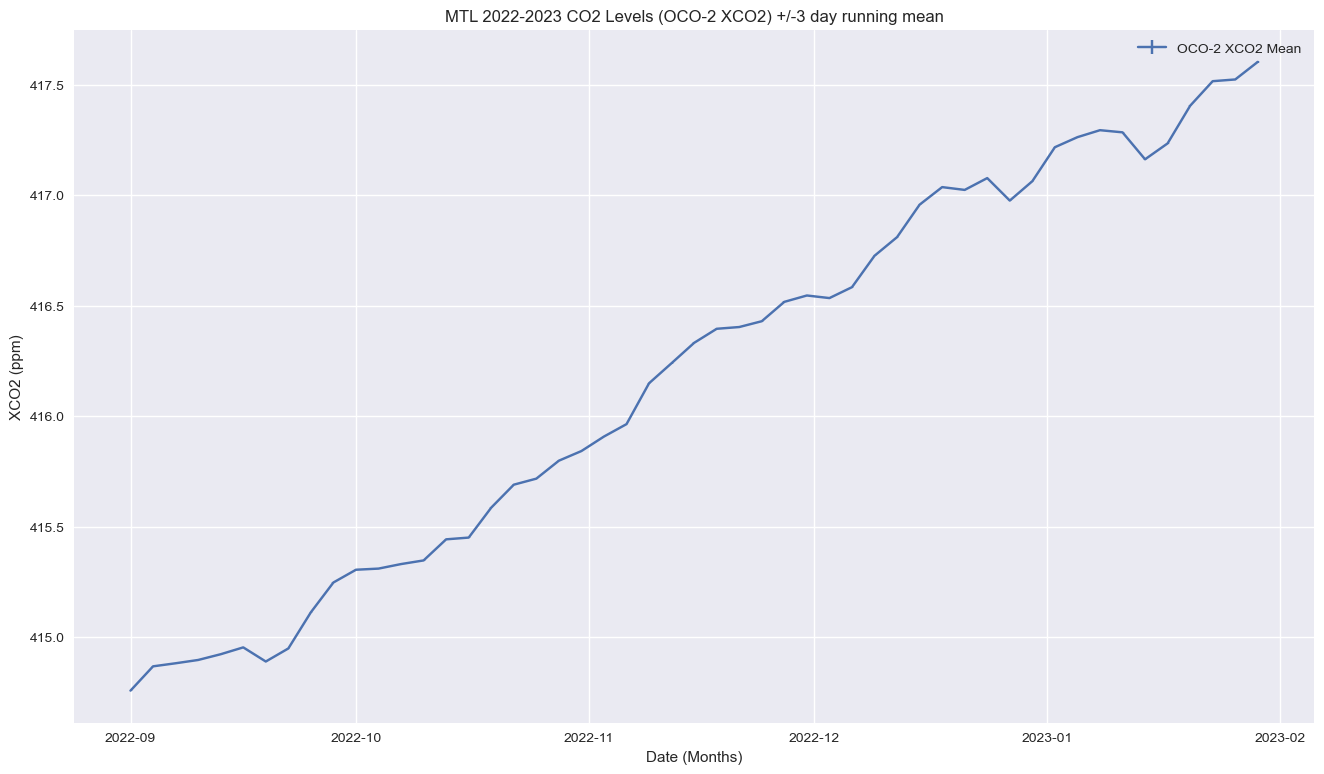

In [51]:
plt.figure(figsize=(16,9))
plt.errorbar(dates, timeseries_oco2.mean,yerr=timeseries_oco2.standard_error, label='OCO-2 XCO2 Mean')
plt.ylabel('XCO2 (ppm)')
plt.xlabel('Date (Months)')
plt.legend(loc=0)
plt.title('MTL 2022-2023 CO2 Levels (OCO-2 XCO2) +/-3 day running mean')
#plt.savefig('D:/Privat/Uni/Masterthesis/Data/GHG_data/disc_gsfc_nasa/230823/oco2-xco2-mtl-2023-ravg.png')

In [20]:
# Use dates with a 3 day time-step and now use a +/- 3 day filter for the running mean:
timeseries_oco2_b = running_mean(oco2_aoi.time_str, oco2_aoi.xco2, dates, 30)

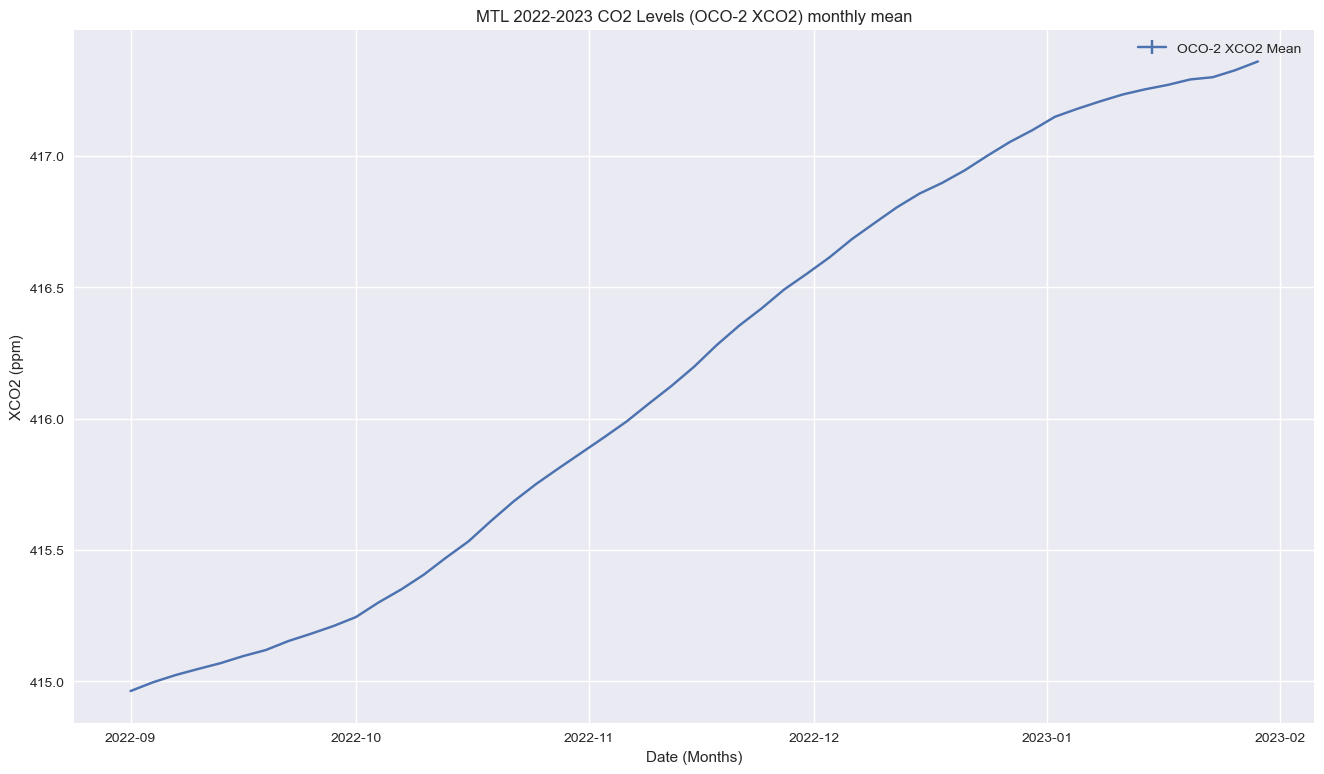

In [52]:
plt.figure(figsize=(16,9))
plt.errorbar(dates, timeseries_oco2_b.mean,yerr=timeseries_oco2_b.standard_error, label='OCO-2 XCO2 Mean')
plt.ylabel('XCO2 (ppm)')
plt.xlabel('Date (Months)')
plt.legend(loc=0)
plt.title('MTL 2022-2023 CO2 Levels (OCO-2 XCO2) monthly mean')
#plt.savefig('D:/Privat/Uni/Masterthesis/Data/GHG_data/disc_gsfc_nasa/230823/oco2-xco2-mtl-2023-ravg_monthly.png')

In [22]:
print(timeseries_oco2_b.mean)

[414.96295166 414.99633789 415.02386475 415.04705811 415.06930542
 415.09609985 415.11911011 415.15328979 415.18099976 415.21051025
 415.24481201 415.30026245 415.34963989 415.40563965 415.47131348
 415.53363037 415.61160278 415.68582153 415.7520752  415.81195068
 415.8704834  415.92901611 415.9894104  416.05819702 416.12539673
 416.19836426 416.28060913 416.35488892 416.42092896 416.49273682
 416.55245972 416.61453247 416.68438721 416.7454834  416.80578613
 416.85778809 416.8984375  416.94613647 417.00152588 417.05410767
 417.09912109 417.15008545 417.1807251  417.20874023 417.2348938
 417.25482178 417.27145386 417.2923584  417.30084229 417.32763672
 417.36071777]


In [40]:
# exporting a string variable into the csv file
input_variable = timeseries_oco2_b.mean
 
# Example.csv gets created in the current working directory
with open('Example.csv', 'w', newline = '') as csvfile:
    fieldnames = ['xco2']
    my_writer = csv.DictWriter(csvfile, fieldnames=fieldnames, delimiter = ';')
    
    my_writer.writeheader()
    my_writer.writerow(input_variable)

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

# fin